In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

Data_Set_Source: https://www.kaggle.com/datasets/joebeachcapital/airbnb

In [2]:
air=pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\airbnb-listings.csv",sep=";")

C:\Users\selen\AppData\Local\Temp\ipykernel_138980\3470018433.py:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  air=pd.read_csv(r"C:\Users\selen\OneDrive\Masaüstü\Dataset\airbnb-listings.csv",sep=";")


In [3]:
air.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


In [ ]:
air.drop(["Listing Url"],axis=1,inplace=True)

In [6]:
air.columns

Index(['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Sec

### The 50 cities with the most flights.

In [7]:
air.City.isna().sum() #boş değerlere bakıyoruz

454

In [18]:
air.dropna(subset=["City"],inplace=True) #454 tane boş değeri siliyoruz

0

In [23]:
air_most_city=air["City"].value_counts()
air_most_city.reset_index

<bound method Series.reset_index of City
Paris                                    54513
London                                   47423
Berlin                                   20454
New York                                 19528
Los Angeles                              19426
                                         ...  
Yarra Valley, Yarra Glen, Healesville        1
Jordan,Yua Ma Tei,Tsim Sha Tsui              1
Athen                                        1
valley village                               1
villa verde bajo                             1
Name: count, Length: 5532, dtype: int64>

In [33]:
air_most_city=air_most_city.head(50).sort_values(ascending=False)

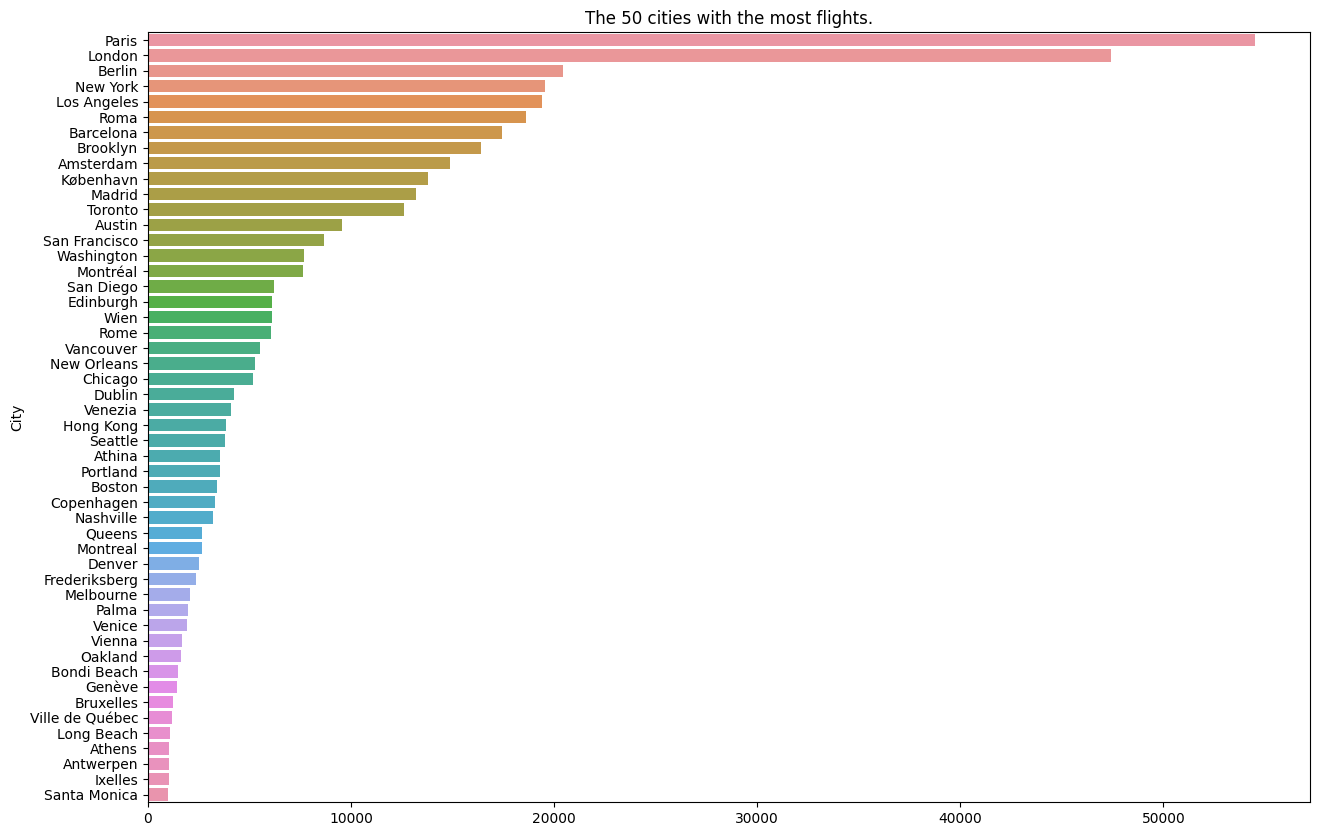

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x=air_most_city.values,y=air_most_city.index)
plt.title("The 50 cities with the most flights.")
plt.show()

### Countries with the highest ratings

In [75]:
air.dropna(subset=["Country","Review Scores Accuracy"],inplace=True)

In [91]:
air.Country.unique()

array(['Netherlands', 'Belgium', 'Greece', 'United Kingdom',
       'United States', 'Spain', 'Australia', 'Canada', 'Germany',
       'Denmark', 'Ireland', 'Hong Kong', 'Switzerland', 'China',
       'France', 'Italy', 'Austria', 'Mexico', 'Vanuatu', 'Uruguay',
       'Vatican City'], dtype=object)

In [84]:
air_scor=air.groupby("Country")["Review Scores Accuracy"].mean()

In [93]:
air_scorr_sorted=air_scor.sort_values(ascending=False)

In [94]:
air_scorr_sorted.reset_index()

,Country,Review Scores Accuracy
0,Vanuatu,10.000000
1,Greece,9.654311
2,Denmark,9.651701
3,Austria,9.625930
4,United States,9.618857
5,Netherlands,9.599346
6,Germany,9.588651
7,Canada,9.581285
8,Australia,9.548030
9,Mexico,9.500000


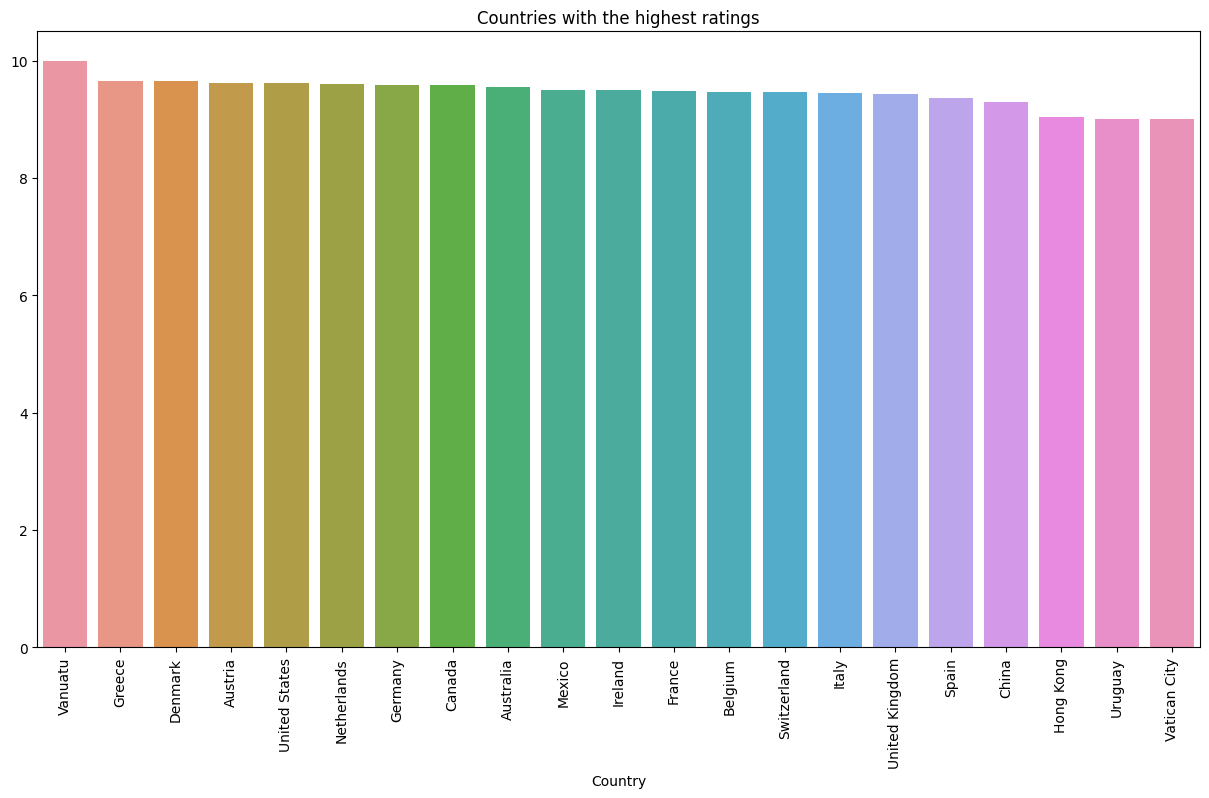

In [105]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x=air_scorr_sorted.index,y=air_scorr_sorted.values)
plt.title("Countries with the highest ratings")
plt.show()

In [109]:
air.columns

Index(['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Sec

### Analysis of the Weekly Price Average by country

Weekly Price Mean

In [148]:
air_w_price=air.groupby("Country")["Weekly Price"].mean().sort_values(ascending=False)

In [143]:
air.dropna(subset="Weekly Price",inplace=True)

In [149]:
air_w_price.reset_index()

,Country,Weekly Price
0,Hong Kong,720.277778
1,China,710.333333
2,Netherlands,635.730233
3,Australia,587.269261
4,Switzerland,575.987273
5,United States,573.981669
6,Denmark,532.596154
7,France,502.825823
8,Italy,501.919630
9,Canada,491.976057


Monthly Price Mean

In [150]:
air_m_price=air.groupby("Country")["Monthly Price"].mean().sort_values(ascending=False)

In [152]:
air.dropna(subset="Monthly Price",inplace=True)

In [153]:
air_m_price.reset_index()

,Country,Monthly Price
0,Hong Kong,3041.571429
1,China,2834.666667
2,Australia,2165.302242
3,Netherlands,2071.452254
4,Switzerland,1957.135135
5,United States,1951.013783
6,Denmark,1932.040000
7,France,1662.757951
8,Ireland,1656.386236
9,United Kingdom,1598.955061


Price mean

In [161]:
air_price=air.groupby("Country")["Price"].mean().sort_values(ascending=False)

In [162]:
air.dropna(subset="Price",inplace=True)

In [163]:
air_price.reset_index()

,Country,Price
0,Denmark,566.000000
1,Hong Kong,217.846154
2,Netherlands,108.806723
3,China,104.000000
4,Australia,101.573094
5,United States,92.936787
6,Switzerland,89.435135
7,Ireland,82.478933
8,Canada,81.437944
9,France,78.724294


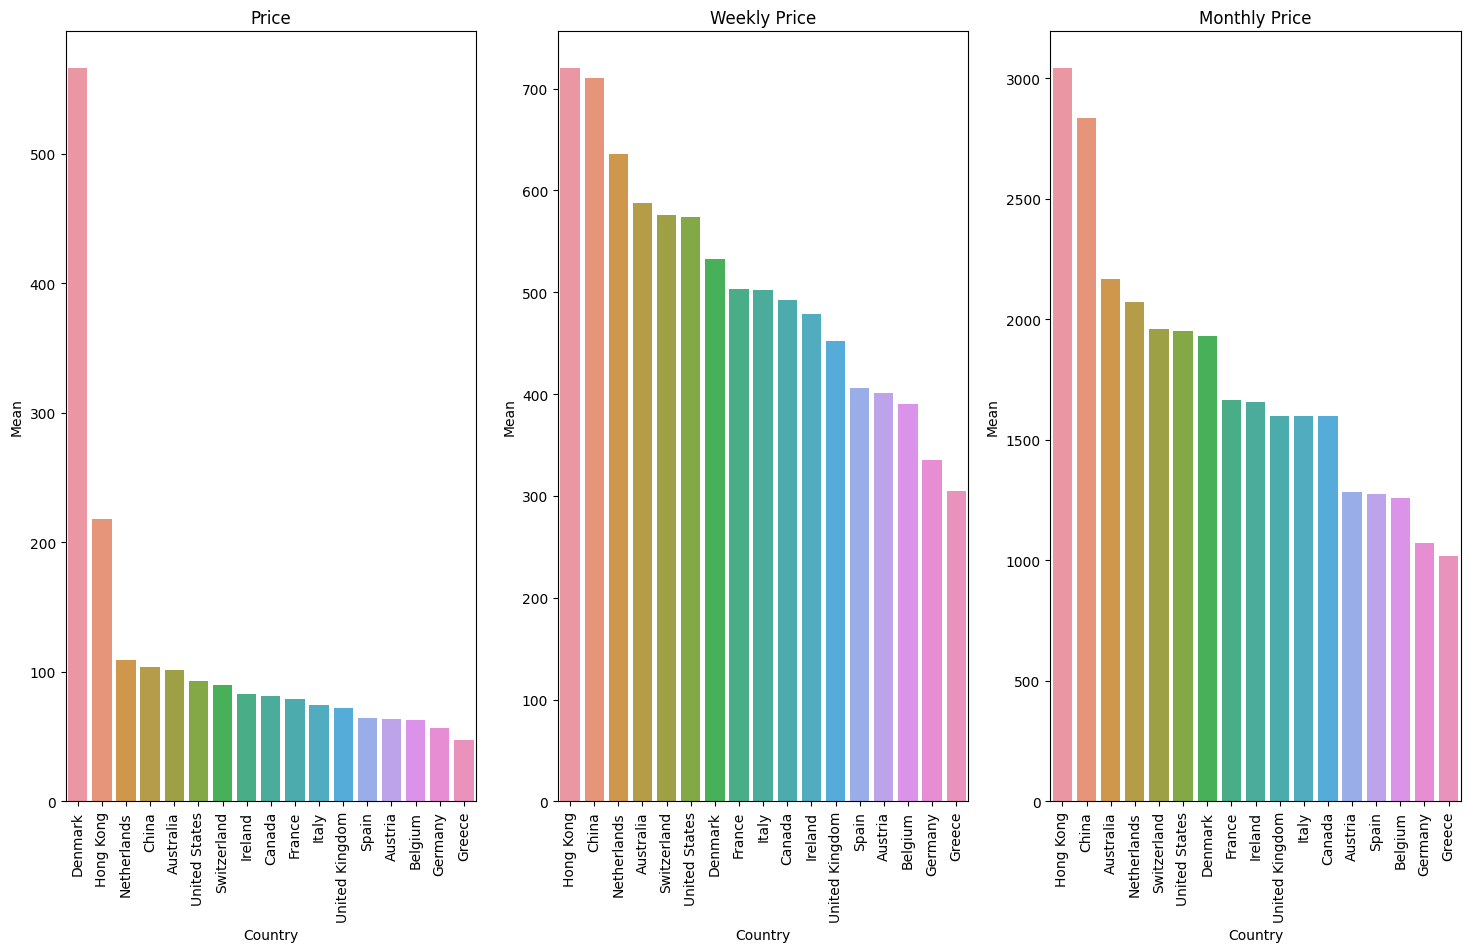

In [213]:
fig,ax =plt.subplots(1,3 ,figsize=(18,10))
#Price
ax[0].tick_params(axis='x', rotation=90)
sns.barplot(x=air_price.index,y=air_price.values,ax=ax[0])
ax[0].set_title('Price')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Mean')


#weekly price
ax[1].tick_params(axis='x', rotation=90)
sns.barplot(x=air_w_price.index,y=air_w_price.values,ax=ax[1])
ax[1].set_title('Weekly Price')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Mean')


#Monthly Price
ax[2].tick_params(axis='x', rotation=90)
sns.barplot(x=air_m_price.index,y=air_m_price.values,ax=ax[2])
ax[2].set_title('Monthly Price')
ax[2].set_xlabel('Country')
ax[2].set_ylabel('Mean')
plt.show()


In [214]:
air.columns

Index(['ID', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
       'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Sec

En çok uçuş yapan yolcu ismi

In [221]:
air["Name"]

9           Familie huis met tuin, Vondelpark
10                City roof terrace apartment
14            Cosy Family home with park view
16          Great Apt - 4 People (Vondelpark)
18         Appartment in centre on canal/wifi
                         ...                 
494894          Charming Mountain Guest House
494896       Pirates of the Caribbean Getaway
494918          Cozy Room No.2 in Quiet Court
494938    Spacious rm 9min Airport 30min City
494950      Sunny room in gorgeous Yarraville
Name: Name, Length: 59033, dtype: object